In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
notebook_path = os.path.abspath(os.path.join(os.getcwd(), '../notebooks'))
input_file_path = rf'{notebook_path}\data\processed'

Data Head:
   tick_number             datetime    price  actual_openprice  ticks_moved  \
0            1  2023-01-01 17:05:00  130.825           130.825            1   
1            2  2023-01-01 18:06:00  130.725           130.719            1   
2            3  2023-01-01 18:43:00  130.825           130.855            1   
3            4  2023-01-01 19:05:00  130.925           130.950            1   
4            5  2023-01-01 19:14:00  131.025           131.031            1   

   directions  fx_return  
0          -1        NaN  
1          -1  -0.081024  
2           1   0.104040  
3           1   0.072599  
4           1   0.061856  

Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10516 entries, 0 to 10515
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   tick_number       10516 non-null  int64  
 1   datetime          10516 non-null  object 
 2   price             10516 non-null  float

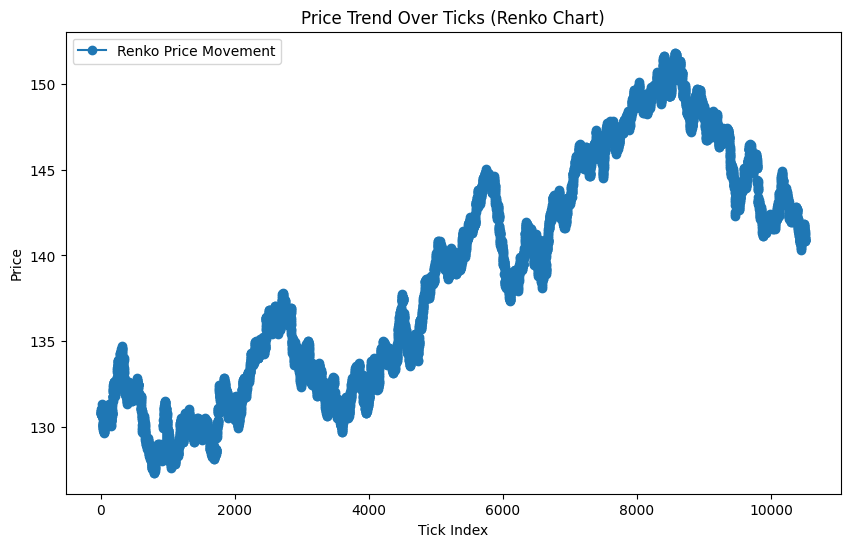

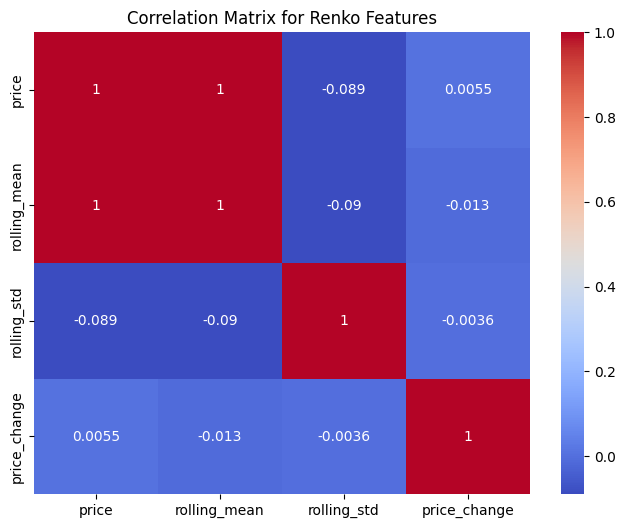

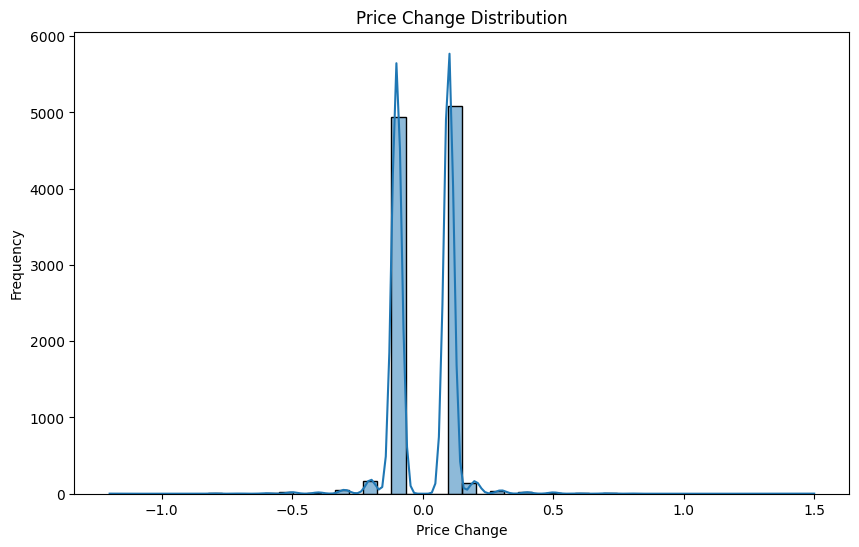

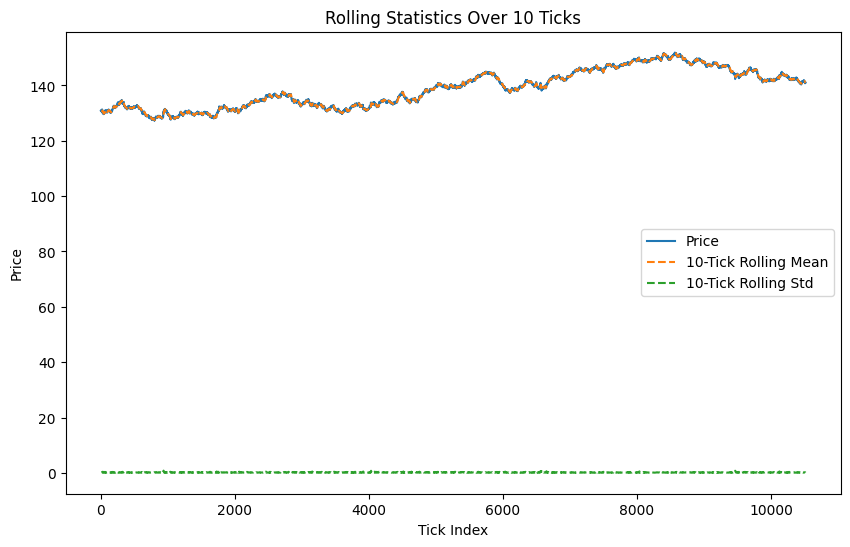

In [ ]:
year = "2023"
ccy = "gbpusd"

# Load the data
file_path = rf'{input_file_path}/{year}_{ccy}_tick_prev_price_as_base.csv'
df = pd.read_csv(file_path)

# Display basic information 
print("Data Head:")
print(df.head())

print("\nData Info:")
print(df.info())

print("\nSummary Statistics:")
print(df.describe())

# Check for missing values
missing_values = df.isnull().sum()
print("\nMissing Values:")
print(missing_values)

# Renko Chart Price Trend Visualization (Ticks as x-axis)
if 'price' in df.columns:
    plt.figure(figsize=(10, 6))
    plt.plot(df.index, df['price'], label='Renko Price Movement', marker='o')
    plt.xlabel('Tick Index')
    plt.ylabel('Price')
    plt.title('Price Trend Over Ticks (Renko Chart)')
    plt.legend()
    plt.show()

# Timestamp Side Information
if 'timestamp' in df.columns:
    df['timestamp'] = pd.to_datetime(df['timestamp'])
    print("\nSample Timestamps with Ticks:")
    print(df[['timestamp', 'price']].head())

# Add rolling features for correlation analysis
rolling_window = 10
if 'price' in df.columns:
    df['rolling_mean'] = df['price'].rolling(window=rolling_window).mean()
    df['rolling_std'] = df['price'].rolling(window=rolling_window).std()
    df['price_change'] = df['price'].diff()  # Price change between ticks

# Correlation Analysis
# Select relevant features for correlation
correlation_features = ['price', 'rolling_mean', 'rolling_std', 'price_change']
correlation_matrix = df[correlation_features].corr()

# Plot correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix for Renko Features")
plt.show()

# Price Change Distribution
if 'price_change' in df.columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(df['price_change'], bins=50, kde=True)
    plt.title("Price Change Distribution")
    plt.xlabel("Price Change")
    plt.ylabel("Frequency")
    plt.show()

# Rolling Statistics Visualization
if 'price' in df.columns and 'rolling_mean' in df.columns:
    plt.figure(figsize=(10, 6))
    plt.plot(df.index, df['price'], label='Price')
    plt.plot(df.index, df['rolling_mean'], label=f'{rolling_window}-Tick Rolling Mean', linestyle='--')
    plt.plot(df.index, df['rolling_std'], label=f'{rolling_window}-Tick Rolling Std', linestyle='--')
    plt.xlabel('Tick Index')
    plt.ylabel('Price')
    plt.legend()
    plt.title(f"Rolling Statistics Over {rolling_window} Ticks")
    plt.show()
